In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
import torch
import tensorflow as tf
!pip install transformers

     |████████████████████████████████| 1.1MB 2.7MB/s 
     |████████████████████████████████| 890kB 15.8MB/s 
     |████████████████████████████████| 3.0MB 16.2MB/s 
     |████████████████████████████████| 1.1MB 32.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=fcd0f014f43dbc6177340456650d077596c2d5f5db9849dc5943de4678c8a0e9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=91e8dedded3f91cba53aec0b0f68060ee5aab62e4c2187cd3b2e204f10dfa89b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/wordemb_dataset.csv',usecols=['instance','label exp 2'])
print(df.head())

                                            instance  label exp 2
0   any project searching for a shared female ide...          0.0
1   searching a shared female identity in the wor...          0.0
2   misleading yet the shared endeavour by women ...          0.0
3   shared endeavour women to succeed in their ch...          0.0
4   succeed their chosen field and on their own t...          0.0


In [ ]:
df.iloc[0]

instance        any project searching for a shared female ide...
label exp 2                                                    0
Name: 0, dtype: object

In [ ]:
import random
n=df.shape[0]
test_size=(n*10)//100
val_size=(n*10)//100
train_size=(n*90)//100

ntest_instances=set()
nval_instances=set()
ntrain_instances=set()

while len(ntest_instances)<=test_size:
    ntest_instances.add(random.randint(0,n-1))

while len(nval_instances)<=val_size:
  r=random.randint(0,n-1)
  if r not in ntest_instances:
    nval_instances.add(r)
  
for r in range((train_size)):
  if r not in ntest_instances and r not in nval_instances:
    ntrain_instances.add(r)


In [ ]:
test_df = pd.DataFrame()
val_df = pd.DataFrame()
train_df = pd.DataFrame()

for i in ntest_instances:
  #print(df.iloc[i])
  test_df=test_df.append(df.loc[i],ignore_index=True)
print(test_df.head())

for i in nval_instances:
  val_df=val_df.append(df.loc[i],ignore_index=True)
print(val_df.head())

for i in ntrain_instances:
  train_df=train_df.append(df.loc[i],ignore_index=True)
print(train_df.head())


                                            instance  label exp 2
0   came to appreciate the importance of the chan...          1.0
1   adaptation the classic russian novel by nikol...          1.0
2   b pack up camp drive into strawberry and stay...          1.0
3   the two dogs the rear of the van and they barked          1.0
4                  a smudge of make up rubbed on the          0.0
                                            instance  label exp 2
0   shared endeavour women to succeed in their ch...          0.0
1   stand alone division now particularly with th...          0.0
2                  his coat and draped it over harry          1.0
3   middle anyone who has dined on crab or lobste...          0.0
4   information officer to categorise topics by a...          0.0
                                            instance  label exp 2
0   any project searching for a shared female ide...          0.0
1   searching a shared female identity in the wor...          0.0
2   mislea

In [ ]:
test_df.shape,val_df.shape,train_df.shape

((1883, 2), (1883, 2), (13558, 2))

In [ ]:
train_df.head()

,instance,label exp 2
0,any project searching for a shared female ide...,0.0
1,searching a shared female identity in the wor...,0.0
2,misleading yet the shared endeavour by women ...,0.0
3,succeed their chosen field and on their own t...,0.0
4,four words describing the effect of prophecy ...,0.0


In [ ]:
sentences_train = train_df['instance'].values
labels_train = train_df['label exp 2'].values
sentences_val = val_df['instance'].values
labels_val = val_df['label exp 2'].values
# labels=labels.astype('float64') 
type(sentences_train),type(labels_train),sentences_train,labels_train

(numpy.ndarray,
 numpy.ndarray,
 array([' any project searching for a shared female identity in',
        ' searching a shared female identity in the work may be misleading',
        ' misleading yet the shared endeavour by women to succeed in their',
        ...,
        ' depict the development case decoration between the s and the s',
        ' three copies of the video are due to',
        ' video are due to each of you and i wonder if'], dtype=object),
 array([0., 0., 0., ..., 0., 1., 0.]))

In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Loading BERT tokenizer...


In [ ]:
type(tokenizer.get_vocab()),len(tokenizer.get_vocab())

(dict, 30522)

In [ ]:
# Print the original sentence.
print(' Original: ', sentences_train[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences_train[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences_train[0])))

print('Directly: ', tokenizer.encode(sentences_train[0]))
#note that the enode function added that start of sentence and end of sentence tag also i.e 101 and 102

 Original:   any project searching for a shared female identity in
Tokenized:  ['any', 'project', 'searching', 'for', 'a', 'shared', 'female', 'identity', 'in']
Token IDs:  [2151, 2622, 6575, 2005, 1037, 4207, 2931, 4767, 1999]
Directly:  [101, 2151, 2622, 6575, 2005, 1037, 4207, 2931, 4767, 1999, 102]


In [ ]:
max_len = 0

# For every sentence...
for sent in sentences_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  26


In [ ]:
# For every sentence...
for sent in sentences_val:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  26


# PREPROCESSING

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_train = []
attention_masks_train = []

# For every sentence...
for sent in sentences_train:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict_train = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 26,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_train.append(encoded_dict_train['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_train.append(encoded_dict_train['attention_mask'])
# print('before')
# print(encoded_dict)
# print(input_ids) # shape = 8551 x 64
# print(attention_masks) # shape = 8551 x 64

# Convert the lists into tensors.
input_ids_train = torch.cat(input_ids_train, dim=0)
attention_masks_train = torch.cat(attention_masks_train, dim=0)
labels_train = torch.tensor(labels_train)

# Print sentence 0, now as a list of IDs.


Streaming output truncated to the last 5000 lines.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' trun

In [ ]:
print('Original: ', sentences_train[0])
print('Token IDs:', input_ids_train[0])

Original:   any project searching for a shared female identity in
Token IDs: tensor([ 101, 2151, 2622, 6575, 2005, 1037, 4207, 2931, 4767, 1999,  102,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0])


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids_val = []
attention_masks_val = []

# For every sentence...
for sent in sentences_val:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict_val = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 26,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids_val.append(encoded_dict_val['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_val.append(encoded_dict_val['attention_mask'])
# print('before')
# print(encoded_dict)
# print(input_ids) # shape = 8551 x 64
# print(attention_masks) # shape = 8551 x 64

# Convert the lists into tensors.
input_ids_val = torch.cat(input_ids_val, dim=0)
attention_masks_val = torch.cat(attention_masks_val, dim=0)
labels_val = torch.tensor(labels_val)

# Print sentence 0, now as a list of IDs.


Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1773: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Truncation was not explicitely activated but `max_length` is provided a specific value, please use

In [ ]:
print('Original: ', sentences_val[0])
print('Token IDs:', input_ids_val[0])

In [ ]:
len(sentences_train),len(sentences_val)

(13558, 1883)

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)
# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
# train_size = int(0.9 * len(dataset))
# val_size = len(dataset) - train_size
# # train_size = len(sentences)
# # val_size = 0

# # Divide the dataset by randomly selecting samples.
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# print('{:>5,} training samples'.format(train_size))
# print('{:>5,} validation samples'.format(val_size))
print(len(train_dataset))
print(len(val_dataset))

13558
1883


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32


# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
(train_dataloader.dataset[0])

(tensor([ 101, 2151, 2622, 6575, 2005, 1037, 4207, 2931, 4767, 1999,  102,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 tensor(0., dtype=torch.float64))

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [ ]:
model.get_input_embeddings(),model.get_output_embeddings()

(Embedding(30522, 768, padding_idx=0), None)

In [ ]:
model.num_labels

2

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

# for p in params[0:5]:
#     print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====


==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (768,)
bert.encoder.layer.0.attention.output.LayerNorm.weight        (768,)
bert.encoder.layer.0.attention.output.LayerNorm.bias          (768,)
bert.encoder.layer.0.intermediate.dense.weight           (3072, 768)
bert.encoder.layer.0.intermediate.dense.bias                 (3072,)
bert.encoder.layer.0.output.dense.weight                 (768, 

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
#Create a schedule with a learning rate that decreases linearly after linearly increasing during a warmup period.

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:

import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # are given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels.long())

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels.long())
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    # try:
    #avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    # except:
    avg_val_accuracy = total_eval_accuracy / (len(validation_dataloader)+1)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / (len(validation_dataloader)+1)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    424.    Elapsed: 0:00:13.
  Batch    80  of    424.    Elapsed: 0:00:26.
  Batch   120  of    424.    Elapsed: 0:00:39.
  Batch   160  of    424.    Elapsed: 0:00:52.
  Batch   200  of    424.    Elapsed: 0:01:05.
  Batch   240  of    424.    Elapsed: 0:01:18.
  Batch   280  of    424.    Elapsed: 0:01:31.
  Batch   320  of    424.    Elapsed: 0:01:44.
  Batch   360  of    424.    Elapsed: 0:01:57.
  Batch   400  of    424.    Elapsed: 0:02:10.

  Average training loss: 0.42
  Training epcoh took: 0:02:18

Running Validation...
  Accuracy: 0.84
  Validation Loss: 0.34
  Validation took: 0:00:06

======== Epoch 2 / 2 ========
Training...
  Batch    40  of    424.    Elapsed: 0:00:13.
  Batch    80  of    424.    Elapsed: 0:00:26.
  Batch   120  of    424.    Elapsed: 0:00:39.
  Batch   160  of    424.    Elapsed: 0:00:52.
  Batch   200  of    424.    Elapsed: 0:01:05.
  Batch   240  of    424.    Elapsed: 0:01:18.
  Batch  

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.42,0.34,0.84,0:02:18,0:00:06
2,0.29,0.35,0.85,0:02:18,0:00:06


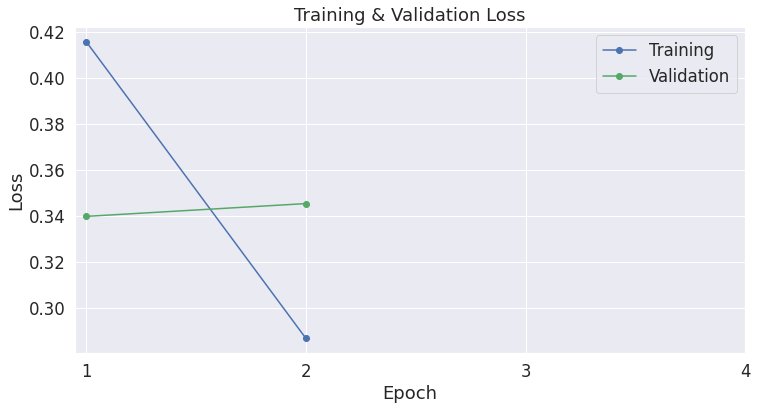

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
test_df.head()

,instance,label exp 2
0,came to appreciate the importance of the chan...,1.0
1,adaptation the classic russian novel by nikol...,1.0
2,b pack up camp drive into strawberry and stay...,1.0
3,the two dogs the rear of the van and they barked,1.0
4,a smudge of make up rubbed on the,0.0


In [ ]:
import pandas as pd

# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
# print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = test_df['instance'].values
labels = test_df['label exp 2'].values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 117  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 1,883 test sentences...
    DONE.


In [ ]:
# from sklearn.metrics import matthews_corrcoef
import numpy
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
f1_set = []
p_set=[]
r_set=[]
acc_set=[]

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating f1 score for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  # matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  # matthews_set.append(matthews)\
  true_labels[i] = numpy.nan_to_num(true_labels[i]) 
  pred_labels_i = numpy.nan_to_num(pred_labels_i) 
  f1=f1_score(true_labels[i], pred_labels_i)
  p=precision_score(true_labels[i], pred_labels_i)
  r=recall_score(true_labels[i], pred_labels_i)
  acc=accuracy_score(true_labels[i], pred_labels_i)

  f1_set.append(f1)
  p_set.append(p)
  r_set.append(r)
  acc_set.append(acc)

Calculating f1 score for each batch...


In [ ]:
f1_set

[0.8333333333333333,
 0.8648648648648648,
 0.9203539823008849,
 0.8461538461538461,
 0.865979381443299,
 0.8703703703703703,
 0.7628865979381444,
 0.7848101265822784,
 0.8503937007874016,
 0.9090909090909091,
 0.859375,
 0.8703703703703703,
 0.8943089430894309,
 0.8210526315789474,
 0.875,
 0.8245614035087719,
 0.7499999999999999]

In [ ]:
p_set

[0.9090909090909091,
 0.8571428571428571,
 0.8813559322033898,
 0.7857142857142857,
 0.8235294117647058,
 0.8867924528301887,
 0.6491228070175439,
 0.6888888888888889,
 0.8709677419354839,
 0.8928571428571429,
 0.8333333333333334,
 0.8545454545454545,
 0.9016393442622951,
 0.78,
 0.8571428571428571,
 0.8867924528301887,
 1.0]

In [ ]:
r_set

[0.7692307692307693,
 0.8727272727272727,
 0.9629629629629629,
 0.9166666666666666,
 0.9130434782608695,
 0.8545454545454545,
 0.925,
 0.9117647058823529,
 0.8307692307692308,
 0.9259259259259259,
 0.8870967741935484,
 0.8867924528301887,
 0.8870967741935484,
 0.8666666666666667,
 0.8936170212765957,
 0.7704918032786885,
 0.6]

In [ ]:
acc_set

[0.8632478632478633,
 0.8717948717948718,
 0.9230769230769231,
 0.8632478632478633,
 0.8888888888888888,
 0.8803418803418803,
 0.8034188034188035,
 0.8547008547008547,
 0.8376068376068376,
 0.9145299145299145,
 0.8461538461538461,
 0.8803418803418803,
 0.8888888888888888,
 0.8547008547008547,
 0.8974358974358975,
 0.8290598290598291,
 0.8181818181818182]